<a href="https://colab.research.google.com/github/ViniciusStabile/pipeline-gasolina/blob/main/Gasolina_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação de dados

In [39]:
import pandas as pd
import geopandas as gpd

In [40]:
df_2024_1 = pd.read_csv('/content/Preços semestrais - AUTOMOTIVOS_2024.01.csv', sep =';')
df_2024_2 = pd.read_csv('/content/Preços semestrais - AUTOMOTIVOS_2024.02.csv',sep =';')

# Concatenando os dois DFs

In [41]:
df = pd.concat([df_2024_1,df_2024_2]).reset_index(drop=True)

# Exploração de Dados

In [42]:
df.shape

(898536, 16)

In [43]:
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,DIESEL S10,01/01/2024,"5,93",NaN,R$ / litro,VIBRA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,01/01/2024,"5,48",NaN,R$ / litro,VIBRA


In [44]:
df.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
898531,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA,31/12/2024,"6,39",NaN,R$ / litro,ALE
898532,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA ADITIVADA,31/12/2024,"6,39",NaN,R$ / litro,ALE
898533,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,DIESEL,31/12/2024,"6,19",NaN,R$ / litro,ALE
898534,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,DIESEL S10,31/12/2024,"6,34",NaN,R$ / litro,ALE
898535,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,ETANOL,31/12/2024,"4,39",NaN,R$ / litro,ALE


In [45]:
df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898536 entries, 0 to 898535
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     898536 non-null  object 
 1   Estado - Sigla     898536 non-null  object 
 2   Municipio          898536 non-null  object 
 3   Revenda            898536 non-null  object 
 4   CNPJ da Revenda    898536 non-null  object 
 5   Nome da Rua        898536 non-null  object 
 6   Numero Rua         898371 non-null  object 
 7   Complemento        205528 non-null  object 
 8   Bairro             897095 non-null  object 
 9   Cep                898536 non-null  object 
 10  Produto            898536 non-null  object 
 11  Data da Coleta     898536 non-null  object 
 12  Valor de Venda     898536 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  898536 non-null  object 
 15  Bandeira           898536 non-null  object 
dtypes:

#  Limpeza e Tratamento de Dados


In [47]:
df.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
CNPJ da Revenda,0
Nome da Rua,0
Numero Rua,165
Complemento,693008
Bairro,1441
Cep,0


In [48]:
df = df.drop('Valor de Compra', axis=1)
df = df.drop('Nome da Rua', axis=1)
df = df.drop('Bairro', axis=1)
df = df.drop('CNPJ da Revenda', axis=1)
df = df.drop('Complemento', axis=1)

In [49]:
df.duplicated().sum()

np.int64(345)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    if col != 'Regiao - Sigla' and col != 'Estado - Sigla':
        df[col] = df[col].str.lower().str.title()
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Numero Rua,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,Arapiraca,Comercial De Combustiveis E Lubrificantes Vita...,1901,57312-025,Gasolina,01/01/2024,"5,68",R$ / Litro,Vibra
1,NE,AL,Arapiraca,Comercial De Combustiveis E Lubrificantes Vita...,1901,57312-025,Gasolina Aditivada,01/01/2024,"5,68",R$ / Litro,Vibra
2,NE,AL,Arapiraca,Comercial De Combustiveis E Lubrificantes Vita...,1901,57312-025,Diesel S10,01/01/2024,"5,93",R$ / Litro,Vibra
3,NE,AL,Arapiraca,Comercial De Combustiveis E Lubrificantes Vita...,1901,57312-025,Etanol,01/01/2024,"3,99",R$ / Litro,Vibra
4,NE,AL,Arapiraca,Auto Posto Sao Francisco Ltda,274,57300-080,Gasolina,01/01/2024,"5,48",R$ / Litro,Vibra


In [52]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype(float)

# Análise exploratória (gráficos)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

In [55]:
df_valor_estado = df.groupby('Estado - Sigla')['Valor de Venda'].mean().sort_values(ascending=False)

In [56]:
brasil.rename(columns={'sigla': 'Estado - Sigla'}, inplace=True)

In [57]:
brasil = brasil.merge(df_valor_estado, on='Estado - Sigla')

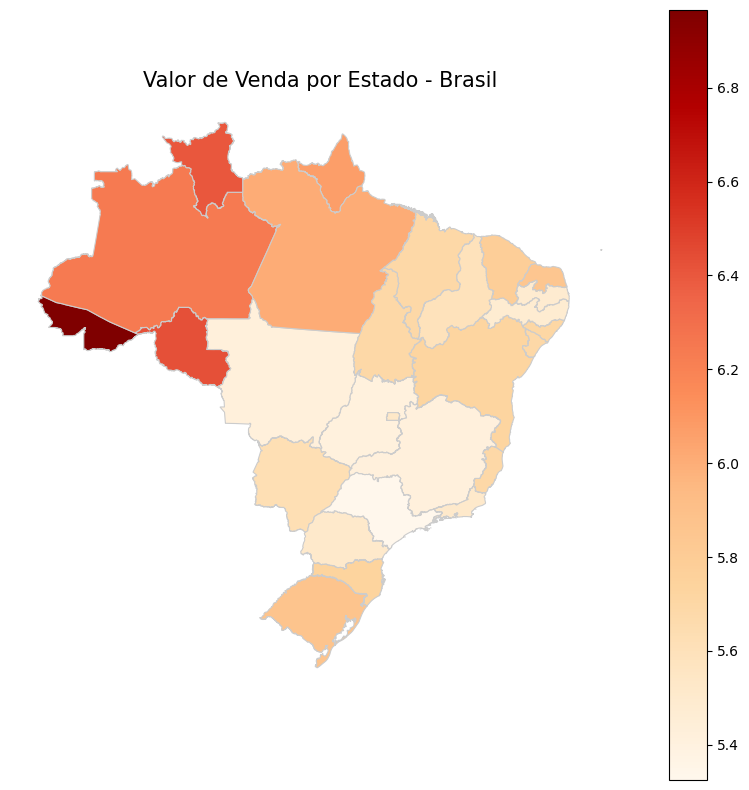

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(column='Valor de Venda', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Valor de Venda por Estado - Brasil', fontsize=15)
plt.axis('off')
plt.show()

In [59]:
df_valor_por_bandeira = df.groupby('Bandeira')['Valor de Venda'].mean().sort_values(ascending=False).reset_index()

In [60]:
top_10_mais_caras = df_valor_por_bandeira.head(10)
top_10_mais_baratas = df_valor_por_bandeira.tail(10)

<ipython-input-61-1abd3745f0b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_mais_caras, x='Valor de Venda', y='Bandeira', palette='Reds_r')


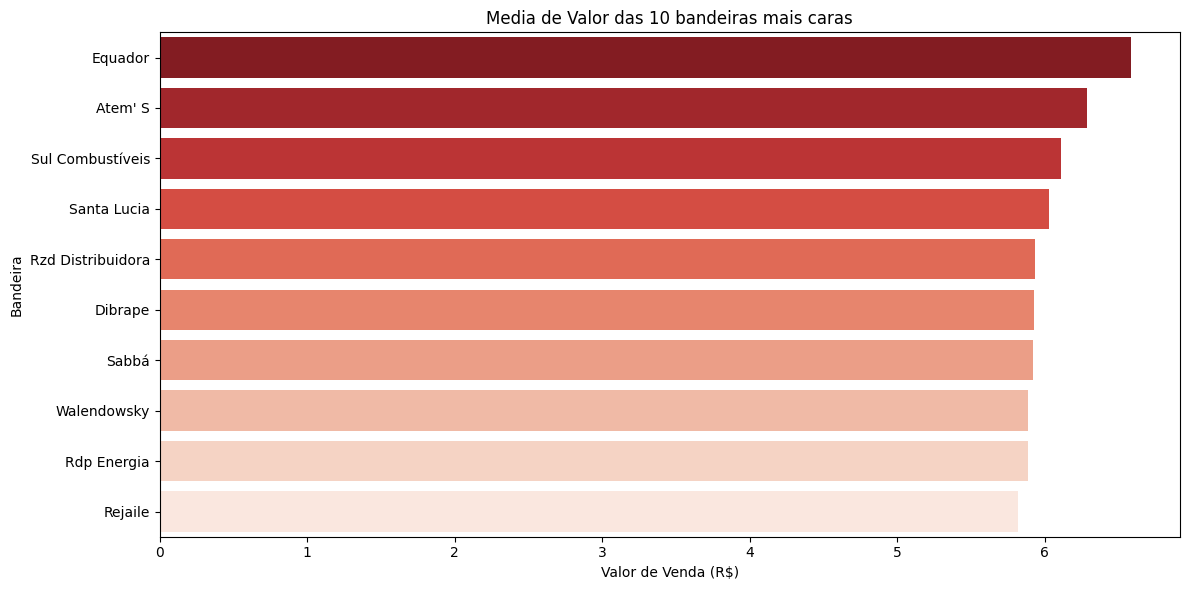

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_mais_caras, x='Valor de Venda', y='Bandeira', palette='Reds_r')

plt.title('Media de Valor das 10 bandeiras mais caras')
plt.xlabel('Valor de Venda (R$)')
plt.ylabel('Bandeira')
plt.tight_layout()
plt.show()

<ipython-input-62-7b13a0d1c6a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_mais_baratas, x='Valor de Venda', y='Bandeira', palette='Blues_r')


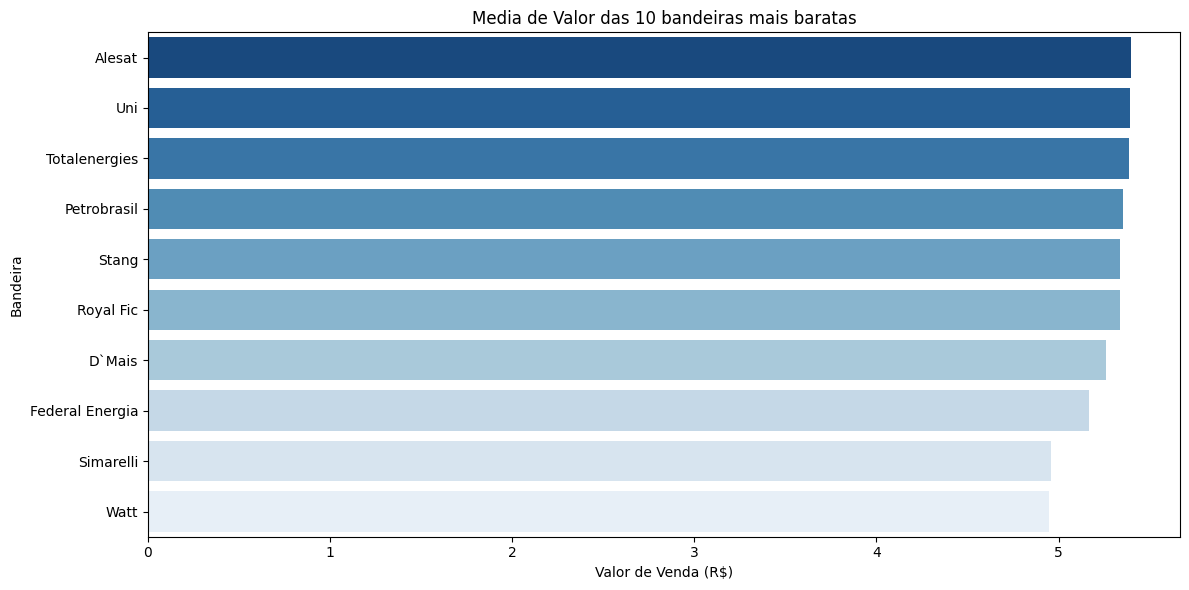

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_mais_baratas, x='Valor de Venda', y='Bandeira', palette='Blues_r')

plt.title('Media de Valor das 10 bandeiras mais baratas')
plt.xlabel('Valor de Venda (R$)')
plt.ylabel('Bandeira')
plt.tight_layout()
plt.show()

In [63]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], dayfirst=True)

In [64]:
df['Mes'] = df['Data da Coleta'].dt.to_period('M').astype(str)

In [65]:
media_mensal = df.groupby('Mes')['Valor de Venda'].mean().reset_index()

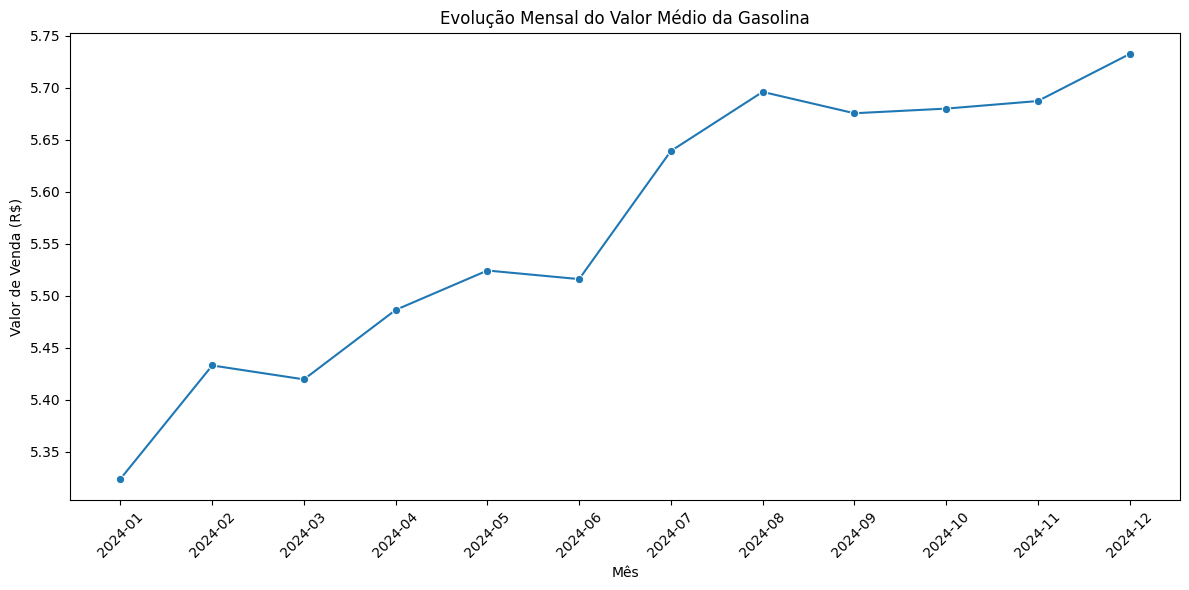

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=media_mensal, x='Mes', y='Valor de Venda', marker='o')

plt.title('Evolução Mensal do Valor Médio da Gasolina')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
df_por_regiao = df.groupby('Regiao - Sigla')['Valor de Venda'].mean().sort_values(ascending=False).reset_index()

<ipython-input-68-ece1c9353506>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_por_regiao, x='Valor de Venda', y='Regiao - Sigla', palette='YlOrBr_r')


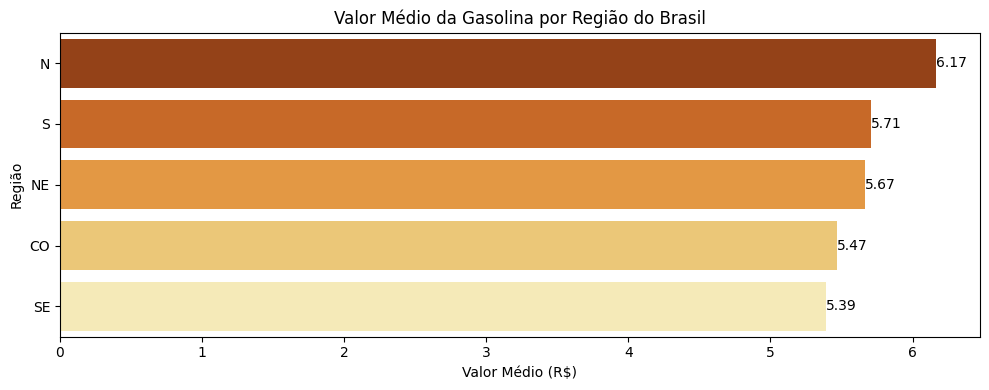

In [68]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_por_regiao, x='Valor de Venda', y='Regiao - Sigla', palette='YlOrBr_r')

plt.title('Valor Médio da Gasolina por Região do Brasil')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Região')

for index, row in df_por_regiao.iterrows():
    plt.text(row['Valor de Venda'] + 0.0, index, f"{row['Valor de Venda']:.2f}", va='center')

plt.tight_layout()
plt.show()